In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
substations = r"C:\Users\srorta\Desktop\Delaware_Substations\Electric_Substations.geojson" #downloaded substation data
county = r"C:\Users\srorta\Desktop\Delaware_Substations\cb_2018_us_county_500k.zip" #downloaded county data


In [5]:
#reading files as geodataframe
sub_df = geopandas.read_file(substations) 
county_df = geopandas.read_file(county)
county_df

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...
3228,31,073,00835858,0500000US31073,31073,Gosper,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
3229,39,075,01074050,0500000US39075,39075,Holmes,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
3230,48,171,01383871,0500000US48171,48171,Gillespie,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."
3231,55,079,01581100,0500000US55079,55079,Milwaukee,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872..."


In [197]:
sub_df.crs #wanted to know CRS of substation geodataframe. 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [198]:
county_df.crs #Wanted to know CRS of county geodataframe. 

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [199]:
#convert from geographic projection to projected.Chose web-mercator. If needed on web-map, most-likely projection. 
county_df_repro = county_df.to_crs("EPSG:3857")
sub_df_repro = sub_df.to_crs("EPSG:3857")
county_df_repro.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [200]:
county_df_repro.loc[county_df_repro.STATEFP == '10'] #testing query

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
662,10,005,00217269,0500000US10005,10005,Sussex,06,2424543661,674175861,"POLYGON ((-8429401.172 4697329.607, -8425726.1..."
779,10,003,00217270,0500000US10003,10003,New Castle,06,1104149852,175376290,"MULTIPOLYGON (((-8411918.102 4795690.044, -841..."
963,10,001,00217271,0500000US10001,10001,Kent,06,1517232133,550433497,"POLYGON ((-8433576.239 4764277.613, -8432451.4..."


<AxesSubplot:>

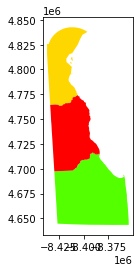

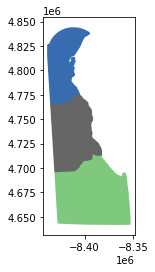

In [201]:
delaware_counties_df = county_df_repro.loc[county_df_repro.STATEFP == '10'].copy() #Don't want to get a warning from chained assignment so just created copy of dataframe.
delaware_counties_df.plot(column = 'NAME', cmap = "prism") #Wanting to see map of Delaware counties. 
delaware_counties_df.geometry = delaware_counties_df.geometry.buffer(1609.34) #1 mile is 1609.34 meters. Working in meters due to web-mercator projection.
delaware_counties_df.geometry.plot(cmap='Accent') # Map of Delaware counties with buffer.

<AxesSubplot:>

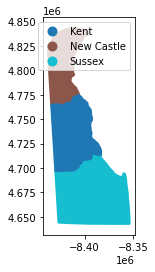

In [202]:
ax = delaware_counties_df.plot(column='NAME',legend = True) #using variable ax for axes 
ax

In [203]:
sub_counties = geopandas.overlay(sub_df_repro,delaware_counties_df, how='intersection') #selecting substations that intersect the 1 mile buffer of delaware counties. 
sub_counties = sub_counties.rename({'NAME_1': 'SUBSTATION_NAME', 'NAME_2': 'COUNTY_WITHIN_1MILE'}, axis='columns') #renaming columns to make more sense
sub_counties.to_csv("Substations_Intersection_with_1MileBuffer.csv")#save geodataframe out as csv to deliver

In [204]:
duplicateRowsDF = sub_counties[sub_counties.duplicated(['ID'])] #finding duplicates, this would occur if one substation is within 1 mile of multiple counties. 
print(duplicateRowsDF) # turns out there are 3 substations that fit multiple counties. ID's 172833,128232,170942
df172833 = sub_counties.loc[sub_counties.ID == "172833"]#testing to see which counties fit this ID
print(df172833) #showing duplicate records for that ID

     OBJECTID      ID SUBSTATION_NAME     CITY STATE    ZIP        TYPE  \
112     53880  172833   UNKNOWN172833  CLAYTON    DE  19938  SUBSTATION   
131     15903  128232   UNKNOWN128232  MILFORD    DE  19963  SUBSTATION   
167     52063  170942   UNKNOWN170942  MILFORD    DE  19963  SUBSTATION   

         STATUS COUNTY COUNTYFIPS  ... STATEFP  COUNTYFP  COUNTYNS  \
112  IN SERVICE   KENT      10001  ...      10       001  00217271   
131  IN SERVICE   KENT      10001  ...      10       005  00217269   
167  IN SERVICE   KENT      10001  ...      10       005  00217269   

           AFFGEOID  GEOID COUNTY_WITHIN_1MILE LSAD       ALAND     AWATER  \
112  0500000US10001  10001                Kent   06  1517232133  550433497   
131  0500000US10005  10005              Sussex   06  2424543661  674175861   
167  0500000US10005  10005              Sussex   06  2424543661  674175861   

                             geometry  
112  POINT (-8420447.736 4762980.986)  
131  POINT (-8401696.425 

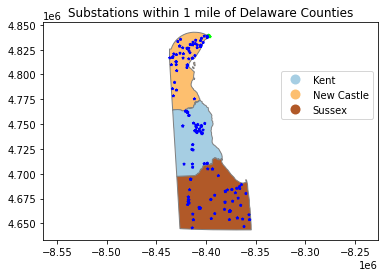

In [205]:
fig, ax = plt.subplots()
ax.set_aspect('equal',adjustable = 'datalim') #aspect ratio 1 to 1.
ax.set_title("Substations within 1 mile of Delaware Counties") #setting title
county_df_repro.loc[county_df_repro.STATEFP == '10'].plot(ax=ax, column = 'NAME', cmap = 'Paired',edgecolor = 'grey',legend=True)#mapping delaware counties
sub_counties.plot(ax=ax, marker='*',column = "STATE",cmap ="brg", markersize = 6, figsize=(8,4))# mapping substations
leg = ax.get_legend()
leg.set_bbox_to_anchor((.7,.5,.3,.3))#repositioning legend
plt.savefig("SubstationsDelware.jpg")#Exporting image